In [2]:
!cd /home/kamil.kural/FdaPrecision Challenge

/usr/bin/sh: line 0: cd: /home/kamil.kural/FdaPrecision: No such file or directory


In [3]:
import numpy as np
import pandas as pd
import os
import copy
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15
from collections import defaultdict
import lightgbm as lgb
import xgboost as xgb
import catboost as cat
import time
import datetime
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit, RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
import gc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import eli5
import shap
from IPython.display import HTML
import json
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from typing import List

import os
import time
import datetime
import json
import gc
from numba import jit

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn import metrics
from typing import Any
from itertools import product
pd.set_option('max_rows', 500)
import re
from tqdm import tqdm
from joblib import Parallel, delayed

Using TensorFlow backend.


In [4]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
import torch 
import fastai
import bayes_opt
import xgboost
import lightgbm

In [5]:
df1=pd.read_csv ('/home/kamil.kural/FdaPrecision Challenge/sc3_Phase1_CN_GE_FeatureMatrix.tsv', sep='\t')

In [6]:
df2=pd.read_csv ('/home/kamil.kural/FdaPrecision Challenge/sc3_Phase1_CN_GE_Outcome.tsv', sep='\t')

In [7]:
df3=pd.read_csv ('/home/kamil.kural/FdaPrecision Challenge/sc3_Phase1_CN_GE_Phenotype.tsv', sep='\t')

In [8]:
df = pd.merge(df2,
                    df1,
                    left_index=True,
                    right_index=True)
df = pd.merge(df,
                    df3,
                    left_index=True,
                    right_index=True)

In [9]:
df=df.drop(['PATIENTID','PATIENTID_x','PATIENTID_y'], axis=1)

In [10]:
categorical_list = []
numerical_list = []
for i in df.columns.tolist():
    if df[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 4
Number of numerical features: 20147


In [11]:
categorical_list

['SEX', 'RACE', 'WHO_GRADING', 'CANCER_TYPE']

In [12]:
X = df.drop(['SURVIVAL_STATUS'], axis=1)
y = df.SURVIVAL_STATUS
feature_name = X.columns.tolist()

In [13]:
X = pd.get_dummies(X, drop_first=True)

In [14]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-200:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [15]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')

200 selected features


In [16]:
cor_feature

['SLC16A9',
 'MAPT.AS1',
 'AHCTF1',
 'LRRC1',
 'FBXW4',
 'GID4',
 'SLC43A3',
 'FERMT1',
 'CHST9',
 'RABGGTB',
 'FAM214A',
 'LRRC8A',
 'SPARC',
 'RGS9',
 'RAB18',
 'PINLYP',
 'ARMH4',
 'MTHFD2',
 'TBCK',
 'RSL24D1',
 'PARD3B',
 'IGFBP2',
 'CHPF2',
 'CEP68',
 'EMC2',
 'BAZ2B',
 'SMAD9',
 'KAT2B',
 'ZMIZ1',
 'PODN',
 'DIMT1',
 'PRDM11',
 'ZBED3',
 'WAC',
 'SH3YL1',
 'INTS6.AS1',
 'EEF1AKMT2',
 'CBR4',
 'SAMD13',
 'EMP3',
 'RPS24',
 'TUFT1',
 'KYAT1',
 'CDKN1B',
 'RGS3',
 'GRB10',
 'ANAPC16',
 'IMPDH1',
 'UQCRB',
 'RPL15',
 'WDFY3.AS2',
 'FRA10AC1',
 'GTF2F2',
 'IGBP1',
 'ERCC6',
 'PDE8B',
 'MED13',
 'RPL4',
 'UPP1',
 'RAB28',
 'ZNF275',
 'RICTOR',
 'SLC9A1',
 'KBTBD7',
 'NCOA4',
 'NUDT4',
 'USP54',
 'BBIP1',
 'RPL23',
 'RPL31',
 'CASTOR1',
 'CHI3L1',
 'ZNF33A',
 'CWF19L2',
 'DYNLL2',
 'NEK1',
 'SERINC5',
 'GCLC',
 'KLHDC2',
 'FBXO8',
 'LOC100287896',
 'SLC25A21.AS1',
 'MNAT1',
 'MICALL2',
 'CCM2',
 'CCDC160',
 'KDM3B',
 'SNHG6',
 'FAM45BP',
 'PRKX',
 'GLUD1',
 'TCEAL1',
 'DHTKD1',
 'KLHDC1',
 'AP2S1',
 'ZHX3',
 'CLNS1A',
 'IKZF5',
 'ABRAXAS1',
 'MTM1',
 'BCR',
 'CTBP2',
 'PDZD8',
 'NCOA2',
 'KMT5B',
 'ZNF518A',
 'ABI1',
 'ARHGAP12',
 'RPP30',
 'ADHFE1',
 'MN1',
 'CCDC121',
 'RIDA',
 'NACA2',
 'NEK7',
 'MBOAT7',
 'BEND7',
 'FLOT1',
 'C8orf37',
 'LINC01088',
 'ARF5',
 'STOX1',
 'MAP4K3',
 'MARCH5',
 'YTHDC1',
 'MXI1',
 'PRTG',
 'PIAS1',
 'RBM17',
 'FARSB',
 'CACUL1',
 'SIRT1',
 'ARL4C',
 'PEX12',
 'FAM168A',
 'SERP1',
 'RIN2',
 'MCAM',
 'CREBRF',
 'FCHSD2',
 'NAP1L1',
 'CREBBP',
 'TET2',
 'RFTN2',
 'TCF7L2',
 'EIF3H',
 'TIMP1',
 'FBXW4P1',
 'SGMS1',
 'BPTF',
 'RPS27A',
 'JADE1',
 'ARID4A',
 'CIR1',
 'SLC15A2',
 'PLAT',
 'HMGN5',
 'KIN',
 'BMPR1A',
 'CDK16',
 'SLC4A3',
 'OSGIN2',
 'MRPS28',
 'TMEM158',
 'SYTL4',
 'PABPC3',
 'SYCP2',
 'RPL13',
 'PELI2',
 'ACBD5',
 'ULBP2',
 'RASSF4',
 'GRAMD2B',
 'MBIP',
 'AP1S1',
 'TBCEL',
 'JMY',
 'GDF10',
 'LIFR',
 'PPARA',
 'OSBPL11',
 'UBR5',
 'PPM1B',
 'WDR11',
 'C11orf54',
 'ZHX2',
 'NBN',
 'CNBP',
 'NSUN6',
 'NRN1',
 'PCMTD1',
 'PDCD4',
 'RPL30',
 'XRN1',
 'MARCH8',
 'OTUD1',
 'PARD3',
 'EIF3E',
 'ASB3',
 'ARHGAP31']

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=200)
chi_selector.fit(X_norm, y)

SelectKBest(k=200, score_func=<function chi2 at 0x7fb45de4e440>)

In [18]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

200 selected features


In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(n_jobs=60), n_features_to_select=200, step=1000, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 20157 features.
Fitting estimator with 19157 features.
Fitting estimator with 18157 features.
Fitting estimator with 17157 features.
Fitting estimator with 16157 features.
Fitting estimator with 15157 features.
Fitting estimator with 14157 features.
Fitting estimator with 13157 features.
Fitting estimator with 12157 features.
Fitting estimator with 11157 features.
Fitting estimator with 10157 features.
Fitting estimator with 9157 features.
Fitting estimator with 8157 features.
Fitting estimator with 7157 features.
Fitting estimator with 6157 features.
Fitting estimator with 5157 features.
Fitting estimator with 4157 features.
Fitting estimator with 3157 features.
Fitting estimator with 2157 features.
Fitting estimator with 1157 features.


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=60, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=200, step=1000, verbose=5)

In [20]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

200 selected features


In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), '15*median',max_features=200)
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=200, norm_order=1, prefit=False,
                threshold='15*median')

In [22]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

200 selected features


In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=1000),max_features=200)
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
 

In [24]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

200 selected features


In [25]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.0001, min_child_weight=0.0001)

embeded_lgb_selector = SelectFromModel(lgbc,max_features=200)
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt',
                                         class_weight=None,
                                         colsample_bytree=0.2,
                                         importance_type='split',
                                         learning_rate=0.05, max_depth=-1,
                                         min_child_samples=20,
                                         min_child_weight=0.0001,
                                         min_split_gain=0.0001,
                                         n_estimators=500, n_jobs=-1,
                                         num_leaves=32, objective=None,
                                         random_state=None, reg_alpha=3,
                                         reg_lambda=1, silent=True,
                                         subsample=1.0,
                                         subsample_for_bin=200000,
                                         subsample_freq=0),
              

In [26]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

200 selected features


In [35]:
pd.set_option('display.max_rows', None)
# put all selection together
k={'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support}
feature_selection_df = pd.DataFrame.from_dict(k, orient='index')
feature_selection_df=feature_selection_df.transpose()
# # count the selected times for each feature
feature_selection_df[["Pearson", "Chi-2","RFE", "Logistics", "Random Forest", "LightGBM"]] *= 1
def f(x):    
    return x[1] + x[2] + x[3] + x[4] + x[5] + x[6]
feature_selection_df['Total']= feature_selection_df.apply(f, axis=1)
# # display the top 200
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df2=feature_selection_df[['Feature','Total']]
feature_selection_df2.head()

,Feature,Total
1,KBTBD7,6.0
2,ASB3,6.0
3,XRN1,5.0
4,SYCP2,5.0
5,MTM1,5.0


In [36]:
feature_selection_df2.to_csv('SubChallenge3_Feature_list')

In [37]:
feature_selection_df2=feature_selection_df2.values.tolist()

In [29]:
categorical_feats=['SEX', 'RACE', 'WHO_GRADING', 'CANCER_TYPE']
for f_ in categorical_feats:
    df[f_], _ = pd.factorize(df[f_])
    # Set feature type as categorical
    df[f_] = df[f_].astype('category')

In [33]:
def score_feature_selection(df=None, train_features=None, cat_feats=None, target=None):
    # Fit LightGBM 
    dtrain = lgb.Dataset(df[train_features], target, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'num_leaves': 128,
        'max_depth': 25,
        'seed': 13,
        'n_jobs': 60,
        'min_split_gain': .00001,
        'reg_alpha': .00001,
        'reg_lambda': .00001,
        'metric': 'auc'
    }
    
    # Fit the model
    hist = lgb.cv(
        params=lgb_params, 
        train_set=dtrain, 
        num_boost_round=2000,
        categorical_feature=cat_feats,
        nfold=10,
        stratified=True,
        shuffle=True,
        early_stopping_rounds=60,
        verbose_eval=0,
        seed=17,
    )
    # Return the last mean / std values 
    return hist['auc-mean'][-1], hist['auc-stdv'][-1]

# features = [f for f in data.columns if f not in ['SK_ID_CURR', 'TARGET']]
# score_feature_selection(df=data[features], train_features=features, target=data['TARGET'])

for threshold in [0, 1, 2, 3, 4, 5, 6]:
    features = [_f for _f, _Total, in feature_selection_df2 if _Total >= threshold]
    split_cat_feats = [_f for _f, _Total, in feature_selection_df2 if (_Total >= threshold) & (_f in categorical_feats)]
    
                                                                                             
    print('Results for threshold %3d' % threshold)
    split_results = score_feature_selection(df, train_features=features, cat_feats=split_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t SPLIT : %.6f +/- %.6f' % (split_results[0], split_results[1]))
    

Results for threshold   0
	 SPLIT : 0.739583 +/- 0.145066
Results for threshold   1
	 SPLIT : 0.920673 +/- 0.052769
Results for threshold   2
	 SPLIT : 0.910577 +/- 0.059138
Results for threshold   3
	 SPLIT : 0.942147 +/- 0.061845
Results for threshold   4
	 SPLIT : 0.910897 +/- 0.064765
Results for threshold   5
	 SPLIT : 0.781731 +/- 0.130742
Results for threshold   6
	 SPLIT : 0.785897 +/- 0.090669


In [32]:
feature_selection_df.head(72)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,KBTBD7,1,1,1,1,1,1,6.0
2,ASB3,1,1,1,1,1,1,6.0
3,XRN1,1,1,1,1,1,0,5.0
4,SYCP2,1,1,1,1,1,0,5.0
5,MTM1,1,0,1,1,1,1,5.0
6,ARMH4,1,0,1,1,1,1,5.0
7,ARHGAP31,1,1,1,1,1,0,5.0
8,ZNF544,0,0,1,1,1,1,4.0
9,SNAPC2,0,0,1,1,1,1,4.0
10,PPP1R14C,0,0,1,1,1,1,4.0


### This part is to test how features identified in subchallenge 1 is behaving in subchallenge 3

In [49]:
feature_selection_df_from_Subchallenge1=pd.read_csv('SubChallenge1_Feature_list',index_col='Feature')

In [50]:
feature_selection_df_from_Subchallenge1=feature_selection_df_from_Subchallenge1.drop('Unnamed: 0', axis=1)

In [51]:
feature_selection_df_from_Subchallenge1=feature_selection_df_from_Subchallenge1.reset_index()

In [52]:
feature_selection_df_from_Subchallenge1.head()

,Feature,Total
0,GMPR2,6.0
1,CASTOR1,6.0
2,PLAT,5.0
3,MTHFD2,5.0
4,MED12,5.0


In [53]:
feature_selection_df_from_Subchallenge1=feature_selection_df_from_Subchallenge1.values.tolist()

In [54]:
categorical_feats=['SEX', 'RACE', 'WHO_GRADING', 'CANCER_TYPE']
for f_ in categorical_feats:
    df[f_], _ = pd.factorize(df[f_])
    # Set feature type as categorical
    df[f_] = df[f_].astype('category')

In [57]:
def score_feature_selection(df=None, train_features=None, cat_feats=None, target=None):
    # Fit LightGBM 
    dtrain = lgb.Dataset(df[train_features], target, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'num_leaves': 128,
        'max_depth': 25,
        'seed': 13,
        'n_jobs': 60,
        'min_split_gain': .00001,
        'reg_alpha': .00001,
        'reg_lambda': .00001,
        'metric': 'auc'
    }
    
    # Fit the model
    hist = lgb.cv(
        params=lgb_params, 
        train_set=dtrain, 
        num_boost_round=2000,
        categorical_feature=cat_feats,
        nfold=10,
        stratified=True,
        shuffle=True,
        early_stopping_rounds=60,
        verbose_eval=0,
        seed=17,
    )
    # Return the last mean / std values 
    return hist['auc-mean'][-1], hist['auc-stdv'][-1]


for threshold in [0, 1, 2, 3, 4, 5, 6]:
    features = [_f for _f, _Total, in feature_selection_df_from_Subchallenge1 if _Total >= threshold]
    split_cat_feats = [_f for _f, _Total, in feature_selection_df_from_Subchallenge1 if (_Total >= threshold) & (_f in categorical_feats)]
    
                                                                                             
    print('Results for threshold %3d' % threshold)
    split_results = score_feature_selection(df, train_features=features, cat_feats=split_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t SPLIT : %.6f +/- %.6f' % (split_results[0], split_results[1]))
    

Results for threshold   0
	 SPLIT : 0.768910 +/- 0.129403
Results for threshold   1
	 SPLIT : 0.867468 +/- 0.064808
Results for threshold   2
	 SPLIT : 0.879327 +/- 0.090604
Results for threshold   3
	 SPLIT : 0.874038 +/- 0.105673
Results for threshold   4
	 SPLIT : 0.809215 +/- 0.066343
Results for threshold   5
	 SPLIT : 0.748478 +/- 0.084969
Results for threshold   6
	 SPLIT : 0.742628 +/- 0.152825


### Based on these results, this method doesn't seem to perform well. Lets try features we obtained from Null Importance method

In [147]:
categorical_feats=['SEX', 'RACE', 'WHO_GRADING', 'CANCER_TYPE']
for f_ in categorical_feats:
    df[f_], _ = pd.factorize(df[f_])
    # Set feature type as categorical
    df[f_] = df[f_].astype('category')

In [148]:
def get_feature_importances(data, shuffle, seed=None):
    # Gather real features
    train_features = [x for x in df.columns if x not in ['SURVIVAL_STATUS']]
    # Go over fold and keep track of CV score (train and valid) and feature importances
    
    # Shuffle target if required
    y = df['SURVIVAL_STATUS'].copy()
    if shuffle:
        # Here you could as well use a binomial distribution
        y = df['SURVIVAL_STATUS'].copy().sample(frac=1.0)
    
    # Fit LightGBM in RF mode, yes it's quicker than sklearn RandomForest
    dtrain = lgb.Dataset(data[train_features], y, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 25,
        'seed': seed,
        'bagging_freq': 1,
        'n_jobs': 60
        #num_leaves= 26, feature_fraction= 0.4, learning_rate= 0.01, bagging_fraction= 1, max_depth= 25,scale_pos_weight=0.5, min_child_weight= 1, n_estimators= 200, lambda_l1= 1, lambda_l2= 2, min_split_gain=0.01, n_jobs= 20, verbose=1
    }
    
    # Fit the model
    clf = lgb.train(params=lgb_params, train_set=dtrain, num_boost_round=200,categorical_feature=categorical_feats)

    # Get feature importances
    imp_df = pd.DataFrame()
    imp_df["feature"] = list(train_features)
    imp_df["importance_gain"] = clf.feature_importance(importance_type='gain')
    imp_df["importance_split"] = clf.feature_importance(importance_type='split')
    imp_df['trn_score'] = roc_auc_score(y, clf.predict(data[train_features]))
    
    return imp_df

In [149]:
from sklearn.metrics import roc_auc_score
# Seed the unexpected randomness of this world
np.random.seed(123)
# Get the actual importance, i.e. without shuffling
actual_imp_df3 = get_feature_importances(data=df, shuffle=False)

In [150]:
actual_imp_df3.head()

,feature,importance_gain,importance_split,trn_score
0,A1BG,2.868384003639308,44,0.969047619047619
1,A1BG.AS1,3.764982953667676,26,0.969047619047619
2,A1CF,0.346089005470285,5,0.969047619047619
3,A2M,3.675188988447195,14,0.969047619047619
4,A2M.AS1,1.615490019321442,6,0.969047619047619


In [ ]:
null_imp_df = pd.DataFrame()
nb_runs = 100
import time
start = time.time()
dsp = ''
for i in range(nb_runs):
    # Get current run importances
    imp_df = get_feature_importances(data=df, shuffle=True)
    imp_df['run'] = i + 1 
    # Concat the latest importances with the old ones
    null_imp_df = pd.concat([null_imp_df, imp_df], axis=0)
    # Erase previous message
    for l in range(len(dsp)):
        print('\b', end='', flush=True)
    # Display current run and time used
    spent = (time.time() - start) / 60
    dsp = 'Done with %4d of %4d (Spent %5.1f min)' % (i + 1, nb_runs, spent)
    print(dsp, end='', flush=True)

Done with   74 of  100 (Spent  24.3 min)

In [ ]:
null_imp_df.to_csv('null_importances_distribution_rf3.csv')
actual_imp_df3.to_csv('actual_importances_ditribution_rf3.csv')

In [ ]:
null_imp_df=pd.read_csv('null_importances_distribution_rf3.csv')
actual_imp_df3=pd.read_csv('actual_importances_ditribution_rf3.csv')

In [160]:
def display_distributions(actual_imp_df3_, null_imp_df_, feature_):
    plt.figure(figsize=(13, 6))
    gs = gridspec.GridSpec(1, 2)
    # Plot Split importances
    ax = plt.subplot(gs[0, 0])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_split'].values, label='Null importances')
    ax.vlines(x=actual_imp_df3_.loc[actual_imp_df3_['feature'] == feature_, 'importance_split'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Split Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (split) Distribution for %s ' % feature_.upper())
    # Plot Gain importances
    ax = plt.subplot(gs[0, 1])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_gain'].values, label='Null importances')
    ax.vlines(x=actual_imp_df3_.loc[actual_imp_df3_['feature'] == feature_, 'importance_gain'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Gain Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (gain) Distribution for %s ' % feature_.upper())
        

In [ ]:
import matplotlib.gridspec as gridspec
feature_scores = []
for _f in actual_imp_df3['feature'].unique():
    f_null_imps_gain = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_gain'].values
    f_act_imps_gain = actual_imp_df3.loc[actual_imp_df3['feature'] == _f, 'importance_gain'].mean()
    gain_score = np.log(1e-10 + f_act_imps_gain / (1 + np.percentile(f_null_imps_gain, 75)))  # Avoid didvide by zero
    f_null_imps_split = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_split'].values
    f_act_imps_split = actual_imp_df3.loc[actual_imp_df3['feature'] == _f, 'importance_split'].mean()
    split_score = np.log(1e-10 + f_act_imps_split / (1 + np.percentile(f_null_imps_split, 75)))  # Avoid didvide by zero
    feature_scores.append((_f, split_score, gain_score))

scores_df = pd.DataFrame(feature_scores, columns=['feature', 'split_score', 'gain_score'])

plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(1, 2)
# Plot Split importances
ax = plt.subplot(gs[0, 0])
sns.barplot(x='split_score', y='feature', data=scores_df.sort_values('split_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt split importances', fontweight='bold', fontsize=14)
# Plot Gain importances
ax = plt.subplot(gs[0, 1])
sns.barplot(x='gain_score', y='feature', data=scores_df.sort_values('gain_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt gain importances', fontweight='bold', fontsize=14)
plt.tight_layout()

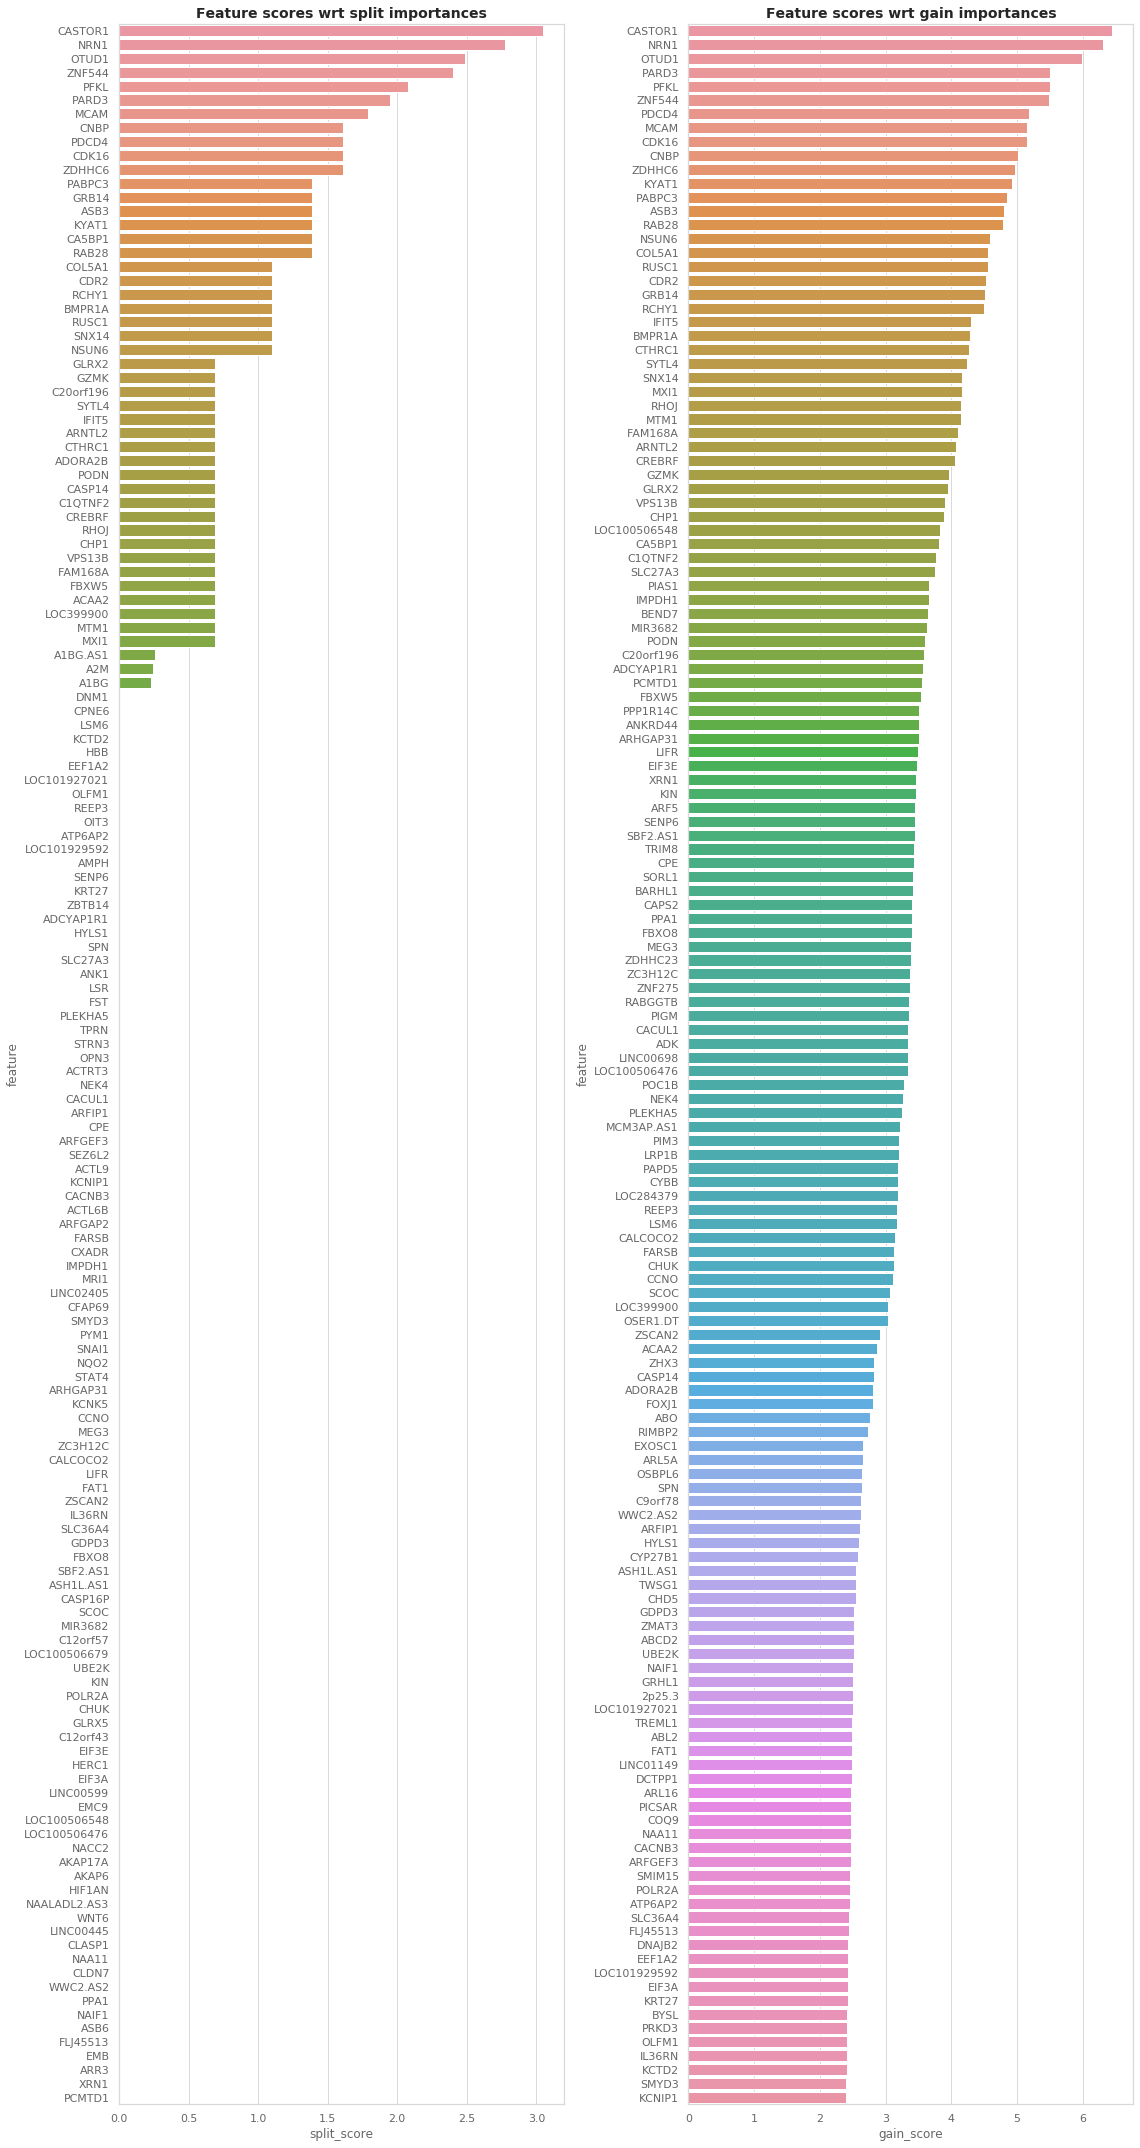

In [168]:
plt.figure(figsize=(16, 30))
gs = gridspec.GridSpec(1, 2)
# Plot Split importances
ax = plt.subplot(gs[0, 0])
sns.barplot(x='split_score', y='feature', data=scores_df.sort_values('split_score', ascending=False).iloc[0:150], ax=ax)
ax.set_title('Feature scores wrt split importances', fontweight='bold', fontsize=14)
# Plot Gain importances
ax = plt.subplot(gs[0, 1])
sns.barplot(x='gain_score', y='feature', data=scores_df.sort_values('gain_score', ascending=False).iloc[0:150], ax=ax)
ax.set_title('Feature scores wrt gain importances', fontweight='bold', fontsize=14)
plt.tight_layout()

In [161]:
feature_score_precision = pd.DataFrame(feature_scores)
feature_score_precision.to_csv('feature_scores_rf3.csv')

In [162]:
correlation_scores = []
for _f in actual_imp_df3['feature'].unique():
    f_null_imps = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_gain'].values
    f_act_imps = actual_imp_df3.loc[actual_imp_df3['feature'] == _f, 'importance_gain'].values
    gain_score = 100 * (f_null_imps < np.percentile(f_act_imps, 25)).sum() / f_null_imps.size
    f_null_imps = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_split'].values
    f_act_imps = actual_imp_df3.loc[actual_imp_df3['feature'] == _f, 'importance_split'].values
    split_score = 100 * (f_null_imps < np.percentile(f_act_imps, 25)).sum() / f_null_imps.size
    correlation_scores.append((_f, split_score, gain_score))

corr_scores_df = pd.DataFrame(correlation_scores, columns=['feature', 'split_score', 'gain_score'])

In [163]:
corr_scores_df.to_csv('correlation_scores_rf3.csv')

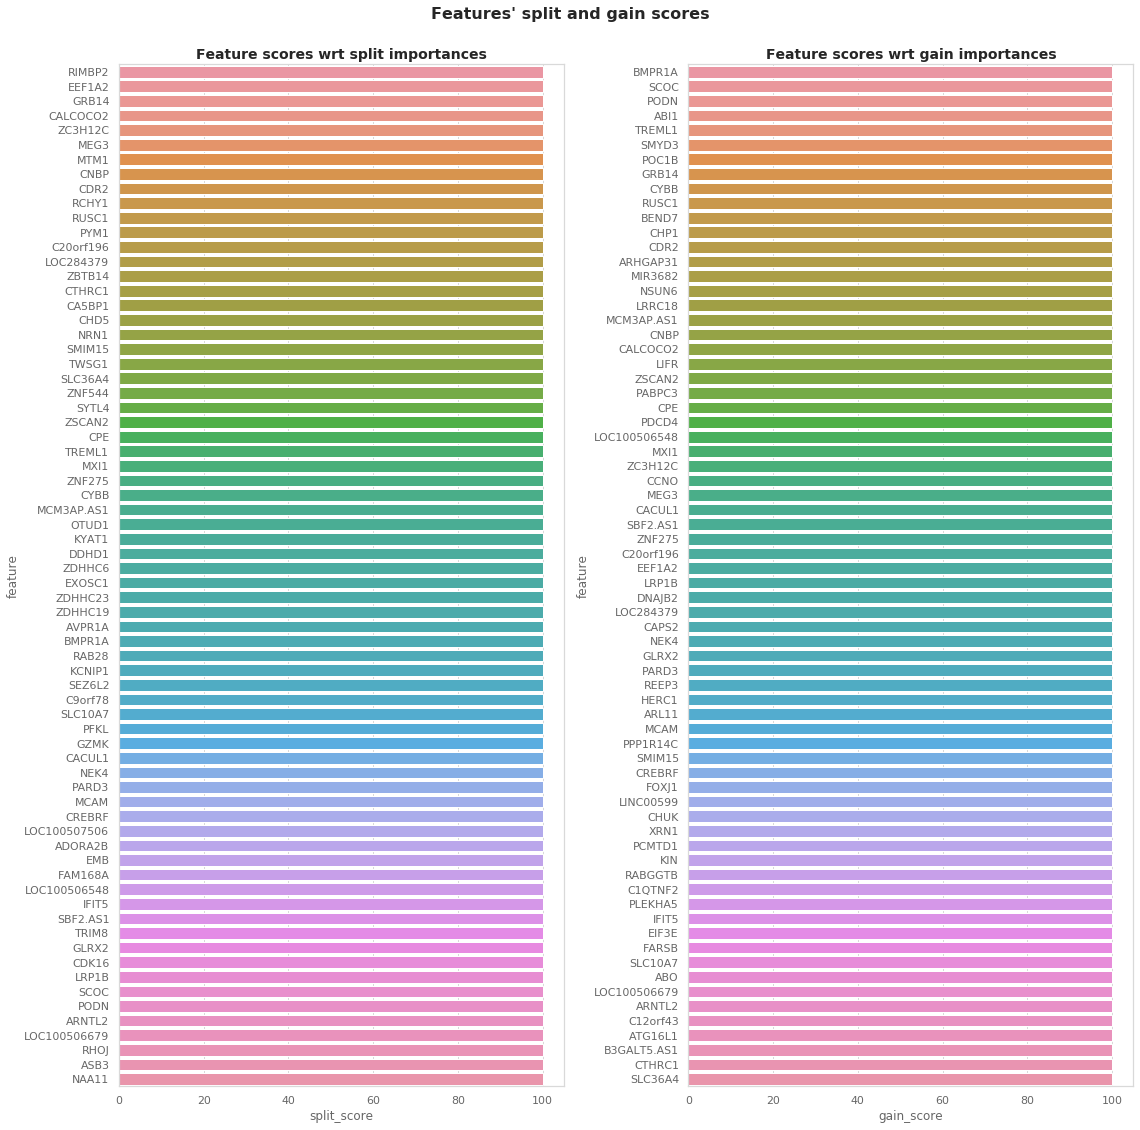

In [164]:
fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(1, 2)
# Plot Split importances
ax = plt.subplot(gs[0, 0])
sns.barplot(x='split_score', y='feature', data=corr_scores_df.sort_values('split_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt split importances', fontweight='bold', fontsize=14)
# Plot Gain importances
ax = plt.subplot(gs[0, 1])
sns.barplot(x='gain_score', y='feature', data=corr_scores_df.sort_values('gain_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt gain importances', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.suptitle("Features' split and gain scores", fontweight='bold', fontsize=16)
fig.subplots_adjust(top=0.93)

### Correlation Features For SubChallenge 3

In [174]:
def score_feature_selection(df=None, train_features=None, cat_feats=None, target=None):
    # Fit LightGBM 
    dtrain = lgb.Dataset(df[train_features], target, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'num_leaves': 128,
        'max_depth': 25,
        'seed': 13,
        'n_jobs': 60,
        'min_split_gain': .00001,
        'reg_alpha': .00001,
        'reg_lambda': .00001,
        'metric': 'auc'
    }
    
    # Fit the model
    hist = lgb.cv(
        params=lgb_params, 
        train_set=dtrain, 
        num_boost_round=2000,
        categorical_feature=cat_feats,
        nfold=10,
        stratified=True,
        shuffle=True,
        early_stopping_rounds=60,
        verbose_eval=0,
        seed=17,
    )
    # Return the last mean / std values 
    return hist['auc-mean'][-1], hist['auc-stdv'][-1]

# features = [f for f in data.columns if f not in ['SK_ID_CURR', 'TARGET']]
# score_feature_selection(df=data[features], train_features=features, target=data['TARGET'])

for threshold in [0, 10, 20, 30 , 40, 50 ,60 , 70, 80 , 90, 95, 99]:
    split_feats = [_f for _f, _score, _ in correlation_scores if _score >= threshold]
    split_cat_feats = [_f for _f, _score, _ in correlation_scores if (_score >= threshold) & (_f in categorical_feats)]
    gain_feats = [_f for _f, _, _score in correlation_scores if _score >= threshold]
    gain_cat_feats = [_f for _f, _, _score in correlation_scores if (_score >= threshold) & (_f in categorical_feats)]
                                                                                             
    print('Results for threshold %3d' % threshold)
    split_results = score_feature_selection(df, train_features=split_feats, cat_feats=split_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t SPLIT : %.6f +/- %.6f' % (split_results[0], split_results[1]))
    gain_results = score_feature_selection(df, train_features=gain_feats, cat_feats=gain_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t GAIN  : %.6f +/- %.6f' % (gain_results[0], gain_results[1]))

Results for threshold   0
	 SPLIT : 0.775000 +/- 0.145080
	 GAIN  : 0.775000 +/- 0.145080
Results for threshold  10
	 SPLIT : 0.900321 +/- 0.065096
	 GAIN  : 0.912660 +/- 0.075219
Results for threshold  20
	 SPLIT : 0.898077 +/- 0.082223
	 GAIN  : 0.912500 +/- 0.059848
Results for threshold  30
	 SPLIT : 0.902885 +/- 0.078458
	 GAIN  : 0.899038 +/- 0.085105
Results for threshold  40
	 SPLIT : 0.908814 +/- 0.067694
	 GAIN  : 0.898558 +/- 0.069011
Results for threshold  50
	 SPLIT : 0.908814 +/- 0.072575
	 GAIN  : 0.892628 +/- 0.073400
Results for threshold  60
	 SPLIT : 0.898718 +/- 0.081981
	 GAIN  : 0.902564 +/- 0.067307
Results for threshold  70
	 SPLIT : 0.869071 +/- 0.088898
	 GAIN  : 0.901122 +/- 0.077137
Results for threshold  80
	 SPLIT : 0.889583 +/- 0.089939
	 GAIN  : 0.900962 +/- 0.069392
Results for threshold  90
	 SPLIT : 0.889263 +/- 0.086492
	 GAIN  : 0.892788 +/- 0.077880
Results for threshold  95
	 SPLIT : 0.913622 +/- 0.063444
	 GAIN  : 0.904487 +/- 0.070797
Results fo

### Feature Scores for SubChallenge 3

In [175]:
def score_feature_selection(df=None, train_features=None, cat_feats=None, target=None):
    # Fit LightGBM 
    dtrain = lgb.Dataset(df[train_features], target, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'num_leaves': 128,
        'max_depth': 25,
        'seed': 13,
        'n_jobs': 60,
        'min_split_gain': .00001,
        'reg_alpha': .00001,
        'reg_lambda': .00001,
        'metric': 'auc'
    }
    
    # Fit the model
    hist = lgb.cv(
        params=lgb_params, 
        train_set=dtrain, 
        num_boost_round=2000,
        categorical_feature=cat_feats,
        nfold=10,
        stratified=True,
        shuffle=True,
        early_stopping_rounds=60,
        verbose_eval=0,
        seed=17,
    )
    # Return the last mean / std values 
    return hist['auc-mean'][-1], hist['auc-stdv'][-1]

# features = [f for f in data.columns if f not in ['SK_ID_CURR', 'TARGET']]
# score_feature_selection(df=data[features], train_features=features, target=data['TARGET'])

for threshold in [-23, 0, 1, 2, 2.5, 3, 3.5,  4, 5, 6]:
    split_feats = [_f for _f, _score, _ in feature_scores if _score >= threshold]
    split_cat_feats = [_f for _f, _score, _ in feature_scores if (_score >= threshold) & (_f in categorical_feats)]
    gain_feats = [_f for _f, _, _score in feature_scores if _score >= threshold]
    gain_cat_feats = [_f for _f, _, _score in feature_scores if (_score >= threshold) & (_f in categorical_feats)]
                                                                                             
    print('Results for threshold %3d' % threshold)
    split_results = score_feature_selection(df, train_features=split_feats, cat_feats=split_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t SPLIT : %.6f +/- %.6f' % (split_results[0], split_results[1]))
    gain_results = score_feature_selection(df, train_features=gain_feats, cat_feats=gain_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t GAIN  : %.6f +/- %.6f' % (gain_results[0], gain_results[1]))

Results for threshold -23
	 SPLIT : 0.898558 +/- 0.074370
	 GAIN  : 0.888782 +/- 0.069475
Results for threshold   0
	 SPLIT : 0.893109 +/- 0.083546
	 GAIN  : 0.899038 +/- 0.083963
Results for threshold   1
	 SPLIT : 0.906410 +/- 0.071173
	 GAIN  : 0.887500 +/- 0.071449
Results for threshold   2
	 SPLIT : 0.866426 +/- 0.108446
	 GAIN  : 0.920513 +/- 0.057044
Results for threshold   2
	 SPLIT : 0.775000 +/- 0.145047
	 GAIN  : 0.897917 +/- 0.071173
Results for threshold   3
	 SPLIT : 0.715705 +/- 0.142846
	 GAIN  : 0.858013 +/- 0.091479
Results for threshold   3
	 SPLIT : 0.500000 +/- 0.000000
	 GAIN  : 0.872917 +/- 0.088127
Results for threshold   4
	 SPLIT : 0.500000 +/- 0.000000
	 GAIN  : 0.887340 +/- 0.072828
Results for threshold   5
	 SPLIT : 0.500000 +/- 0.000000
	 GAIN  : 0.885096 +/- 0.089443
Results for threshold   6
	 SPLIT : 0.500000 +/- 0.000000
	 GAIN  : 0.775000 +/- 0.145047


### Now, Let's try Subchallenge 1 identified features and see how they behave on Subchallenge 3 Data

In [218]:
feature_scores_1=pd.read_csv('feature_scores_rf.csv')

In [231]:
cols = ['0', '1','2']

In [233]:
feature_scores_1=feature_scores_1[cols].values.tolist()

In [234]:
#feature_scores_1=feature_scores_1.values.tolist()

In [235]:
def score_feature_selection(df=None, train_features=None, cat_feats=None, target=None):
    # Fit LightGBM 
    dtrain = lgb.Dataset(df[train_features], target, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'num_leaves': 128,
        'max_depth': 25,
        'seed': 13,
        'n_jobs': 60,
        'min_split_gain': .00001,
        'reg_alpha': .00001,
        'reg_lambda': .00001,
        'metric': 'auc'
    }
    
    # Fit the model
    hist = lgb.cv(
        params=lgb_params, 
        train_set=dtrain, 
        num_boost_round=2000,
        categorical_feature=cat_feats,
        nfold=10,
        stratified=True,
        shuffle=True,
        early_stopping_rounds=60,
        verbose_eval=0,
        seed=17,
    )
    # Return the last mean / std values 
    return hist['auc-mean'][-1], hist['auc-stdv'][-1]

for threshold in [-24 ,-23, 0, 1, 2, 3, 4, 4.2, 4.5, 4.7, 5, 5.1, 5.4, 5.5, 6, 7]:
    split_feats = [_f for _f, _score, _ in feature_scores_1 if _score >= threshold]
    split_cat_feats = [_f for _f, _score, _ in feature_scores_1 if (_score >= threshold) & (_f in categorical_feats)]
    gain_feats = [_f for _f, _, _score in feature_scores_1 if _score >= threshold]
    gain_cat_feats = [_f for _f, _, _score in feature_scores_1 if (_score >= threshold) & (_f in categorical_feats)]
                                                                                             
    print('Results for threshold %3f' % threshold)
    split_results = score_feature_selection(df, train_features=split_feats, cat_feats=split_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t SPLIT : %.6f +/- %.6f' % (split_results[0], split_results[1]))
    gain_results = score_feature_selection(df, train_features=gain_feats, cat_feats=gain_cat_feats, target=df['SURVIVAL_STATUS'])
    print('\t GAIN  : %.6f +/- %.6f' % (gain_results[0], gain_results[1]))

Results for threshold -24.000000
	 SPLIT : 0.754968 +/- 0.138848
	 GAIN  : 0.754968 +/- 0.138848
Results for threshold -23.000000
	 SPLIT : 0.880609 +/- 0.090992
	 GAIN  : 0.854327 +/- 0.107047
Results for threshold 0.000000
	 SPLIT : 0.870192 +/- 0.090160
	 GAIN  : 0.849840 +/- 0.124163
Results for threshold 1.000000
	 SPLIT : 0.779167 +/- 0.160463
	 GAIN  : 0.844231 +/- 0.103053
Results for threshold 2.000000
	 SPLIT : 0.808974 +/- 0.150125
	 GAIN  : 0.848237 +/- 0.109412
Results for threshold 3.000000
	 SPLIT : 0.754968 +/- 0.164669
	 GAIN  : 0.834936 +/- 0.089675
Results for threshold 4.000000
	 SPLIT : 0.500000 +/- 0.000000
	 GAIN  : 0.782372 +/- 0.158501
Results for threshold 4.200000
	 SPLIT : 0.500000 +/- 0.000000
	 GAIN  : 0.802404 +/- 0.185032
Results for threshold 4.500000
	 SPLIT : 0.500000 +/- 0.000000
	 GAIN  : 0.810897 +/- 0.173433
Results for threshold 4.700000
	 SPLIT : 0.500000 +/- 0.000000
	 GAIN  : 0.809455 +/- 0.159914
Results for threshold 5.000000
	 SPLIT : 0.500

### Our best bet seems to be to use a threshold of 5.0 or 5.5 for GAIN scores as identified by multiple different feature selection methods. We specifically wanted to show how each feature selection method performs so that we could compare and justify which one to use. It looks like PIMP (P-values computed with permutation importance) is an effective method for this kind of task. 

Selecting 5 as threshold yields with: 
PCMTD1
ARAP3
DYNLL2
HAUS4
C4orf19
SMARCC2
CASTOR1
PDCD4
SYCP2
ACBD4
SMU1
SETD1A 
are the important features 

Selecting 5.5 as threshold yields with: 

PCMTD1
ARAP3
DYNLL2
HAUS4
C4orf19
SMARCC2
CASTOR1
are the important features coming from Subchallenge 1.

The important features coming from Subchallenge 2 are 
11p15.4
9p24.1
9p21.3
20q11.21
These features both pass the threshold 6 and split score of 1. In total, we have 11 features to create a Predictive Model for Subchallenge 3

Now let's start training our models with the selected features.